In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
%tensorflow_version 1.x
import sys
import os
import json
import pandas as pd
import numpy as np
import optparse
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.layers.experimental import RandomFourierFeatures
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
#from tensorflow.keras.layers.Embedding import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from collections import OrderedDict

TensorFlow 1.x selected.


In [ ]:
print(tensorflow.__version__)

1.15.2


In [ ]:
# Run this cell only if you are using Colab with Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
cwd = os.getcwd()
dataset_dir = os.path.join(cwd,"drive","MyDrive", 'Akim_thesis/dataset')
print(dataset_dir)

/content/drive/MyDrive/Akim_thesis/dataset


In [ ]:
dataset = pd.read_csv (r''+dataset_dir+'/test.csv')
dataset.head()

,Date,Time,PID,Level,Label,MessageSum,ModuleSum,RequestSum
0,2021-07-05,14:01:15.456,918,ERROR,cinder,4.136373,1.412674,0.0
1,2021-07-05,14:01:25.461,918,ERROR,cinder,4.136373,1.412674,0.0
2,2021-07-05,14:01:35.468,918,ERROR,cinder,4.136373,1.412674,0.0
3,2021-07-05,14:01:45.471,918,ERROR,cinder,4.136373,1.412674,0.0
4,2021-07-05,14:01:55.477,918,ERROR,cinder,4.136373,1.412674,0.0


In [ ]:
def nameToOut(_name):
    if _name == 'INFO' or _name == 'DEBUG':
        return 0
    else:
        return 1

In [ ]:
dataset['Output'] = [nameToOut(item) for item in  dataset['Level']]
dataset.head()


,Date,Time,PID,Level,Label,MessageSum,ModuleSum,RequestSum,Output
0,2021-07-05,14:01:15.456,918,ERROR,cinder,4.136373,1.412674,0.0,1
1,2021-07-05,14:01:25.461,918,ERROR,cinder,4.136373,1.412674,0.0,1
2,2021-07-05,14:01:35.468,918,ERROR,cinder,4.136373,1.412674,0.0,1
3,2021-07-05,14:01:45.471,918,ERROR,cinder,4.136373,1.412674,0.0,1
4,2021-07-05,14:01:55.477,918,ERROR,cinder,4.136373,1.412674,0.0,1


In [ ]:
print(dataset.loc[dataset['Output']==1])

             Date          Time   PID  ... ModuleSum RequestSum  Output
0      2021-07-05  14:01:15.456   918  ...  1.412674   0.000000       1
1      2021-07-05  14:01:25.461   918  ...  1.412674   0.000000       1
2      2021-07-05  14:01:35.468   918  ...  1.412674   0.000000       1
3      2021-07-05  14:01:45.471   918  ...  1.412674   0.000000       1
4      2021-07-05  14:01:55.477   918  ...  1.412674   0.000000       1
...           ...           ...   ...  ...       ...        ...     ...
34985  2021-07-16  17:39:25.665  2560  ...  1.711737   2.236068       1
35125  2021-07-16  17:43:28.703  2560  ...  1.711737   2.236068       1
35128  2021-07-16  17:43:28.713  2560  ...  1.944311   2.236068       1
35130  2021-07-16  17:43:28.714  2560  ...  1.725066   2.236068       1
35994  2021-07-16  18:07:53.678  2560  ...  1.711737   2.236068       1

[17826 rows x 9 columns]


In [ ]:
import calendar
import time
def timeToLong(_time):
    return calendar.timegm(time.strptime(_time, '%Y-%m-%dT%H:%M:%S.%fZ'))

In [ ]:
dataset1 = [item2+'Z' for item2 in dataset['Time']]
dataset2 = [item+'T' for item in dataset['Date']]
dataset['Timestamp'] = pd.DataFrame(dataset2) + pd.DataFrame(dataset1)
dataset['Timestamp'] = [timeToLong(item) for item in dataset['Timestamp'] ]
print(dataset)

             Date          Time   PID  ... RequestSum Output   Timestamp
0      2021-07-05  14:01:15.456   918  ...   0.000000      1  1625493675
1      2021-07-05  14:01:25.461   918  ...   0.000000      1  1625493685
2      2021-07-05  14:01:35.468   918  ...   0.000000      1  1625493695
3      2021-07-05  14:01:45.471   918  ...   0.000000      1  1625493705
4      2021-07-05  14:01:55.477   918  ...   0.000000      1  1625493715
...           ...           ...   ...  ...        ...    ...         ...
36024  2021-07-16  18:08:55.349  2560  ...   2.236068      0  1626458935
36025  2021-07-16  18:08:55.350  2560  ...   2.236068      0  1626458935
36026  2021-07-16  18:08:55.419  2560  ...   2.236068      0  1626458935
36027  2021-07-16  18:08:55.527  2560  ...   2.236068      0  1626458935
36028  2021-07-16  18:08:55.528  2560  ...   2.236068      0  1626458935

[36029 rows x 10 columns]


In [ ]:
dataset.drop(['Date','Time','Level'], axis=1)

,PID,Label,MessageSum,ModuleSum,RequestSum,Output,Timestamp
0,918,cinder,4.136373,1.412674,0.000000,1,1625493675
1,918,cinder,4.136373,1.412674,0.000000,1,1625493685
2,918,cinder,4.136373,1.412674,0.000000,1,1625493695
3,918,cinder,4.136373,1.412674,0.000000,1,1625493705
4,918,cinder,4.136373,1.412674,0.000000,1,1625493715
...,...,...,...,...,...,...,...
36024,2560,nova,5.885701,1.406928,2.236068,0,1626458935
36025,2560,nova,5.829600,1.406928,2.236068,0,1626458935
36026,2560,nova,5.867103,1.406928,2.236068,0,1626458935
36027,2560,nova,4.873734,1.711737,2.236068,0,1626458935


In [ ]:
Y = dataset['Output']
X = dataset.drop('Output', axis=1)
X = X.drop(['Date','Time','Level'], axis=1)

In [ ]:
from sklearn import preprocessing
names=["PID","MessageSum","RequestSum", "ModuleSum","Timestamp"]

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X_scaled,columns = names)

In [ ]:
Y = pd.DataFrame(Y)
X = X.join(Y['Output'])
Errors = X.loc[X['Output']==1]
Errors.head()
Errors.loc[Errors['ModuleSum']!=0]


,PID,Label,MessageSum,ModuleSum,RequestSum,Timestamp,Output
0,918,cinder,4.136373,1.412674,0.0,1625493675,1
1,918,cinder,4.136373,1.412674,0.0,1625493685,1
2,918,cinder,4.136373,1.412674,0.0,1625493695,1
3,918,cinder,4.136373,1.412674,0.0,1625493705,1
4,918,cinder,4.136373,1.412674,0.0,1625493715,1


,PID,Label,MessageSum,ModuleSum,RequestSum,Timestamp,Output
0,918,cinder,4.136373,1.412674,0.000000,1625493675,1
1,918,cinder,4.136373,1.412674,0.000000,1625493685,1
2,918,cinder,4.136373,1.412674,0.000000,1625493695,1
3,918,cinder,4.136373,1.412674,0.000000,1625493705,1
4,918,cinder,4.136373,1.412674,0.000000,1625493715,1
...,...,...,...,...,...,...,...
34985,2560,nova,5.930520,1.711737,2.236068,1626457165,1
35125,2560,nova,5.930520,1.711737,2.236068,1626457408,1
35128,2560,nova,5.633790,1.944311,2.236068,1626457408,1
35130,2560,nova,4.440984,1.725066,2.236068,1626457408,1


In [ ]:
SEED = 1234
Errors = Errors.sample(800000,random_state=SEED,replace=True)
Normal = X.loc[X['Output']==0]
data = [Normal, Errors]
data = pd.concat(data)

In [ ]:
#y = data['Output']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1, stratify=Y)

In [ ]:
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1, stratify=y_train)

In [ ]:
X_train = X_train.sort_values("Timestamp", axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
#X_valid = X_valid.sort_values("Timestamp", axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
X_test = X_test.sort_values("Timestamp", axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [ ]:
y_train = X_train['Output']
#y_valid = X_valid['Output']
y_test = X_test['Output']

In [ ]:
print(X_train)

         PID Label  MessageSum  ModuleSum  RequestSum   Timestamp  Output
54723   2601  nova    3.490832   1.414213    2.236068  1617801558       0
54724   2601  nova    3.490842   1.414213    2.236068  1617801559       0
54725   2601  nova    3.559195   1.414213    2.236068  1617801560       0
54726   2601  nova    3.167928   1.685945    2.236068  1617801560       0
54731   2601  nova    5.798735   1.408275    2.236068  1617801567       0
...      ...   ...         ...        ...         ...         ...     ...
953027  2592  nova    3.913929   1.685945    2.236055  1623997509       0
953028  2592  nova    3.559220   1.414213    2.236055  1623997509       0
953032  2592  nova    5.154845   1.408275    2.236055  1623997509       0
953031  2592  nova    5.251762   1.408275    2.236055  1623997509       0
953029  2592  nova    3.668828   1.705461    2.236055  1623997509       0

[857729 rows x 7 columns]


In [ ]:
#X_valid = X_valid.drop(['Output', 'Timestamp'],axis=1)
X_train = X_train.drop(['Output', 'Timestamp','PID','Label'],axis=1)
X_test = X_test.drop(['Output', 'Timestamp','PID','Label'],axis=1)

In [ ]:
y_train = y_train.to_numpy()

In [ ]:
example_id = np.array(['%d' % i for i in range(len(y_train))])

In [ ]:
X_train = X_train.to_numpy() #.reshape((X_train.shape[0], 1, X_train.shape[1]))
#X_valid = X_valid.to_numpy() #.reshape((X_valid.shape[0], 1, X_valid.shape[1]))


In [ ]:
X_train

array([[3.49083181, 1.41421333, 2.23606798],
       [3.49084249, 1.41421333, 2.23606798],
       [3.55919452, 1.41421333, 2.23606798],
       ...,
       [5.15484458, 1.40827478, 2.23605537],
       [5.25176194, 1.40827478, 2.23605537],
       [3.66882804, 1.70546127, 2.23605537]])

In [ ]:
#X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])


In [ ]:
#X_valid = X_valid.reshape(X_valid.shape[0],1,X_valid.shape[1])

In [ ]:
import tensorflow as tf

x_column_name = 'x'
example_id_column_name = 'example_id'

train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={x_column_name: X_train, example_id_column_name: example_id},
    y=y_train,
    num_epochs=None,
    shuffle=True)

svm = tf.contrib.learn.SVM(
    example_id_column=example_id_column_name,
    feature_columns=(tf.contrib.layers.real_valued_column(
        column_name=x_column_name, dimension=3),),
    l2_regularization=0.1,
    model_dir='/content/drive/MyDrive/Akim_thesis/model_svm_LEVEL_15')

#svm.fit(input_fn=train_input_fn, steps=2100)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fba2f896990>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/content/drive/MyDrive/Akim_thesis/model_svm_LEVEL_15', '_session_creation_timeout_secs': 7200}


In [ ]:
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

AttributeError: ignored

In [ ]:
y_test

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [ ]:
example_id2 = np.array(['%d' % i for i in range(len(y_test))])
x_column_name = 'x'
example_id_column_name = 'example_id'

test_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={x_column_name: X_test, example_id_column_name: example_id2},
    y=y_test,
    num_epochs=None,
    batch_size=36029,
    shuffle=False)


In [ ]:
score = svm.evaluate(input_fn=test_input_fn, steps=1)

INFO:tensorflow:Created variable linear/bias_weight:0, with device=
INFO:tensorflow:Starting evaluation at 2021-10-30T10:15:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/Akim_thesis/model_svm_LEVEL_15/model.ckpt-2100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-10-30-10:15:41
INFO:tensorflow:Saving dict for global step 2100: accuracy = 0.92070276, global_step = 2100, loss = 0.30971152


In [ ]:
X_test.shape

(406736, 4)

In [ ]:
y_prediction = svm.predict_classes(input_fn=test_input_fn, as_iterable=False)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Created variable linear/bias_weight:0, with device=
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/Akim_thesis/model_svm_LEVEL_15/model.ckpt-2100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:
y_prediction

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
print(len(y_pred[0:406736]))

437812


In [ ]:
y_predi = y_pred[0:406736]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn import preprocessing
confusion_mtx = confusion_matrix(y_test,y_prediction)
class_report = classification_report(y_test, y_prediction, 
                                     target_names=["Normal","Anomaly"])  # target_names must be ordered depending on the class labels
print('Confusion Matrix:')
print(confusion_mtx)
print()
print('Classification Report:')
print(class_report)

Confusion Matrix:
[[17955   248]
 [ 2609 15217]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.87      0.99      0.93     18203
     Anomaly       0.98      0.85      0.91     17826

    accuracy                           0.92     36029
   macro avg       0.93      0.92      0.92     36029
weighted avg       0.93      0.92      0.92     36029



In [ ]:
!pip install Scikit-plot

<Figure size 720x504 with 0 Axes>

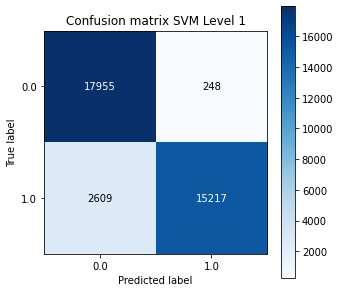

<Figure size 720x504 with 0 Axes>

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skplt
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_prediction, figsize = (5, 5), title= 'Confusion matrix SVM Level 1' )
plt.figure(figsize = (10,7))

In [ ]:
''''example_id = np.array(['%d' % i for i in range(len(y_train))])
train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={x_column_name: X_train, example_id_column_name: example_id},
    y=y_train,
    num_epochs=None,
    shuffle=True)'''
metrics = svm.evaluate(input_fn=train_input_fn, steps=1)
print("Loss", metrics['loss'], "\nAccuracy", metrics['accuracy'])

INFO:tensorflow:Created variable linear/bias_weight:0, with device=
INFO:tensorflow:Starting evaluation at 2021-09-27T14:48:22Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpre2gvlrl/model.ckpt-300000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-09-27-14:48:22
INFO:tensorflow:Saving dict for global step 300000: accuracy = 0.8984375, global_step = 300000, loss = 0.20556399
Loss 0.20556399 
Accuracy 0.8984375
